<a href="https://colab.research.google.com/github/meetsomto/dbs/blob/main/PCA_KMeans_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics

In [2]:
#connect to google drive if data is hosted on drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing dataset and examining it

# from google drive

dataset =pd.read_csv("/content/drive/My Drive/iris.csv")

In [3]:
# direct upload from colab
dataset = pd.read_csv("iris.csv")
print(dataset.head())
print(dataset.shape)
print(dataset.info())
print(dataset.describe())

   SepalLength  SepalWidth  PetalLength  PetalWidth      Species
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa
(150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       SepalLength  SepalWidth  PetalLength  PetalWidth
count   150.000000  150.000000   150.000000  150.000000
mean      5.843333    3.054000    

In [4]:
# Converting Categorical features into Numerical features (0 setosa,1 versicolor,2 virginica)
converter = LabelEncoder()
dataset['Species'] = converter.fit_transform(dataset['Species'].astype(str))
print(dataset.head())
print(dataset.info())

   SepalLength  SepalWidth  PetalLength  PetalWidth  Species
0          5.1         3.5          1.4         0.2        0
1          4.9         3.0          1.4         0.2        0
2          4.7         3.2          1.3         0.2        0
3          4.6         3.1          1.5         0.2        0
4          5.0         3.6          1.4         0.2        0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Species      150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None


In [5]:
# Dividing dataset into label and feature sets
X = dataset.drop('Species', axis = 1) # Features  ... drop 4 columns for predictor
Y = dataset['Species'] # Labels  ..... 1 column for label
print(type(X))
print(type(Y))
print(X.shape)
print(Y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(150, 4)
(150,)


In [6]:
# Normalizing numerical features so that each feature has mean 0 and variance 1
feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(X)

In [7]:
# Implementing PCA to visualize dataset
pca = PCA(n_components = 2)
pca.fit(X_scaled)
x_pca = pca.transform(X_scaled)
print("Variance explained by each of the n_components: ",pca.explained_variance_ratio_)
print("Total variance explained by the n_components: ",sum(pca.explained_variance_ratio_)) # 95% of the data is explained by the two components

Variance explained by each of the n_components:  [0.72770452 0.23030523]
Total variance explained by the n_components:  0.9580097536148197


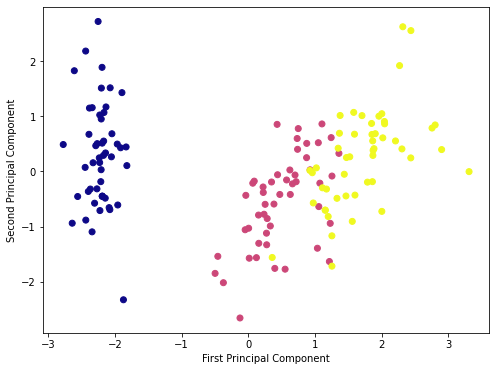

In [8]:
plt.figure(figsize = (8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=Y, cmap='plasma') # pca1, pca2, colordatapointsbyactualflowerlabels, displayfamily
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

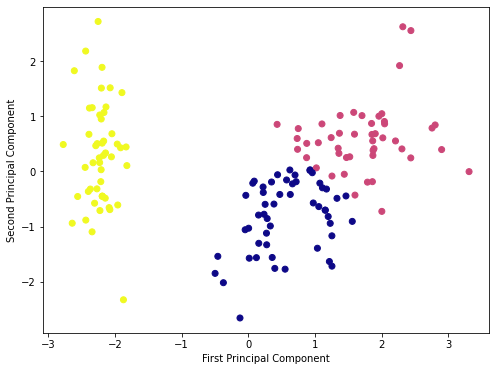

Cluster centers:  [[ 0.56713803 -0.8076751 ]
 [ 1.72236912  0.59990509]
 [-2.22019328  0.29222482]]


In [9]:
# Implementing K-Means CLustering on dataset and visualizing clusters
kmeans = KMeans(n_clusters = 3)
kmeans.fit(x_pca)
plt.figure(figsize = (8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=kmeans.labels_, cmap='plasma') #COLORBYKMEANSLABELSINDENTIFIEDBYKMEANSALGORITHM
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()
print("Cluster centers: ", kmeans.cluster_centers_)

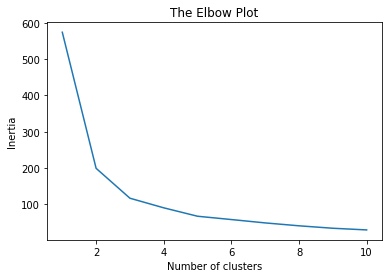

In [10]:
# ASSUMING NO IDEA OF NUMBER OF CLUSTERS

# Finding the number of clusters (K) - Elbow Plot Method
inertia = []
for i in range(1,11): # k
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(x_pca)
    inertia.append(kmeans.inertia_)

# plot
plt.plot(range(1, 11), inertia) #k, inertia
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show() # elbows at k=2 and k=3 and thus a good guess 